<a href="https://colab.research.google.com/github/rajusengupta/.csv/blob/main/KNNClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ==========

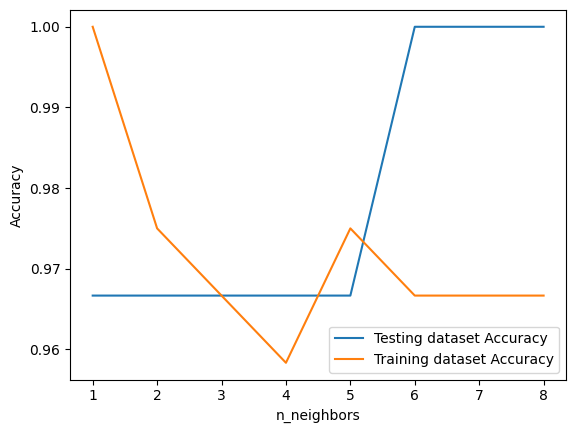

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

np.arange
irisData = load_iris()
print(dir(irisData))
print(irisData.DESCR)
print(irisData.data)
print(irisData.data_module)
print(irisData.feature_names)
print(irisData.frame)
print(irisData.filename)

X = irisData.data
y = irisData.target

X_train, X_test, y_train, y_test = train_test_split(
             X, y, train_size = 0.8, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

print(knn.predict(X_test))

print(knn.score(X_test, y_test))

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 #Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# prompt: how is Knn-Score determined

The KNN score, as calculated by `knn.score(X_test, y_test)` or `knn.score(X_train, y_train)`, represents the **mean accuracy** of the K-Nearest Neighbors classifier on the provided data.

Here's a breakdown:

1. **Prediction:** For each data point in the test set (`X_test`), the KNN classifier finds the `k` nearest neighbors in the training data (`X_train`).  The class label of the data point is predicted based on the majority class among its `k` neighbors.

2. **Comparison:** The predicted class label for each data point is compared to the actual class label from the `y_test` (or `y_train` if using the training set).

3. **Accuracy Calculation:** The accuracy is the proportion of correctly classified data points.  It's calculated as:

   `Number of Correct Predictions / Total Number of Predictions`

4. **Mean Accuracy:** `knn.score()` returns the *mean* accuracy across all data points in the test (or training) set.  A score of 1.0 means perfect accuracy (100% correct classifications).  A score of 0.0 indicates no correct classifications.

In the provided code, the loop iterates through different values of `k` (number of neighbors) and calculates the training and test accuracies for each `k`.  The plot then visualizes how the accuracy changes as `k` increases.  This helps in finding the optimal `k` value that maximizes the test accuracy while avoiding overfitting to the training data.
